In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def update(frame):
    global ball_velocity
    global ball_position
    global trail

    dt = 0.05
    omega = 1.0

    coriolis_force = -2*omega*np.cross([0, 0, 1], ball_velocity)[:2]
    centrifugal_force = -omega**2*ball_position[:2]

    ball_velocity[:2] += (coriolis_force + centrifugal_force)*dt/2

    ball_position[0] += ball_velocity[0]*dt
    ball_position[1] += ball_velocity[1]*dt

    trail.append(ball_position[:2].copy())
    trail = trail[-100:] 

    ball.set_data(ball_position[0], ball_position[1])
    trail_line.set_data(*zip(*trail))

    return ball, trail_line

fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal', 'box')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

table_radius = 2
table = plt.Circle((0, 0), table_radius, color='gray', alpha=0.3)
ax.add_patch(table)

ball_position = np.array([-1.5, 0.0, 0.0])
#ball_position = np.array([0.0, table_radius + 0.1, 0.0])
ball_velocity = np.array([2.0, 0.0, 0.0]) 
ball, = ax.plot([], [], 'bo', markersize=10)

trail = []
trail_line, = ax.plot([], [], color='blue', linestyle='-', linewidth=1)

animation = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=50, blit=True)

plt.show()

# plot for example 10.2 

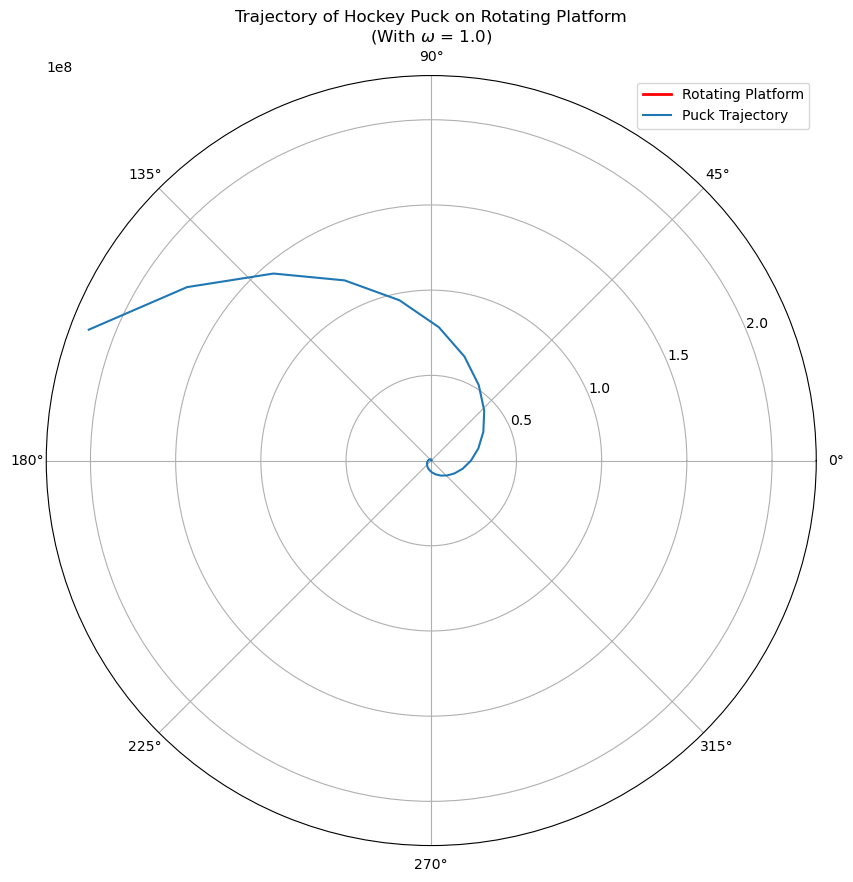

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def puck_motion(t, y, omega):
    r, theta, vr, vtheta = y
    dydt = [vr, vtheta/r, -omega**2*r + 2*omega*vtheta, 2*omega*vr + omega**2*r]
    return dydt

def integrate_motion(omega, t_span, y0):
    sol = solve_ivp(puck_motion, t_span, y0, args=(omega,), dense_output=True)
    return sol

def plot_trajectory(sol, omega):
    theta_values = np.linspace(0, 2 * np.pi, 100)
    platform_radius = 1.0

    plt.figure(figsize=(10, 10))
    plt.polar(theta_values, platform_radius * np.ones_like(theta_values), 'r-', lw=2, label='Rotating Platform')

    r_values = sol.sol(np.linspace(sol.t[0], sol.t[-1], 100))[0]
    theta_values = sol.sol(np.linspace(sol.t[0], sol.t[-1], 100))[1]

    plt.polar(theta_values, r_values, label='Puck Trajectory')

    plt.title(f'Trajectory of Hockey Puck on Rotating Platform\n(With $\omega$ = {omega})')
    plt.legend()
    plt.show()

omega = 1.0 
t_span = (0, 10)
y0 = [0.50, 3.14, 1.0, 1.0] 

solution = integrate_motion(omega, t_span, y0)
plot_trajectory(solution, omega)


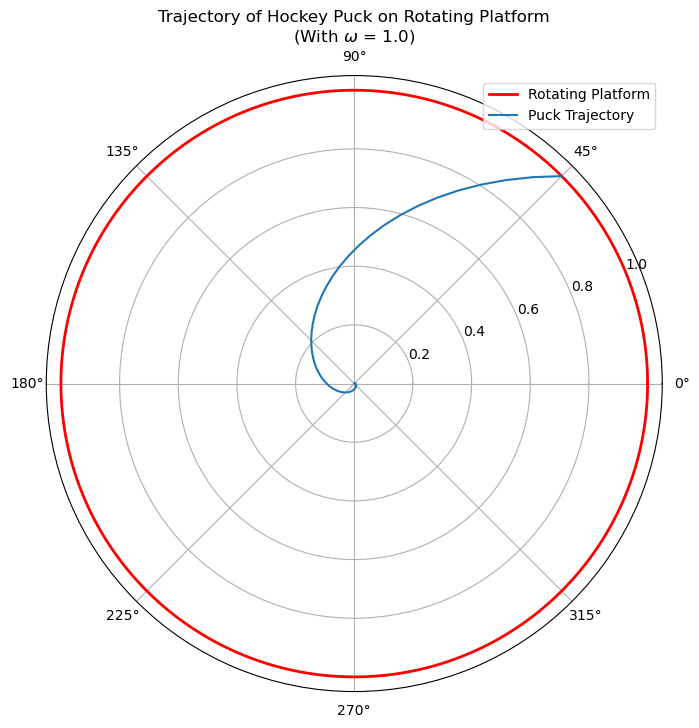

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def puck_motion(t, y, omega):
    r, theta, vr, vtheta = y
    dydt = [vr, vtheta/r, -omega**2 * r + 2 * omega * vtheta, 2 * omega * vr + omega**2 * r]
    return dydt

def integrate_motion(omega, t_span, y0, num_iterations):
    t_eval = np.linspace(t_span[0], t_span[1], num_iterations)
    sol = solve_ivp(puck_motion, t_span, y0, args=(omega,), t_eval=t_eval, dense_output=True)
    return sol

def plot_trajectory(sol, omega):
    theta_values = np.linspace(0, 2*np.pi, 500)
    platform_radius = 1.0

    plt.figure(figsize=(8, 8))
    plt.polar(theta_values, platform_radius * np.ones_like(theta_values), 'r-', lw=2, label='Rotating Platform')

    r_values = sol.sol(sol.t)[0]
    theta_values = sol.sol(sol.t)[1]

    plt.polar(theta_values, r_values, label='Puck Trajectory')

    plt.title(f'Trajectory of Hockey Puck on Rotating Platform\n(With $\omega$ = {omega})')
    plt.legend()
    plt.show()

# Set up initial conditions and parameters
omega = 1.0  # Angular velocity of the rotating platform
t_span = (0, 10)  # Time span for integration
initial_radius = 1.0  # Initial radial position
initial_theta = np.pi / 4  # Initial angular position in radians
initial_velocity = 1.0  # Initial linear velocity
num_iterations = 100  # Number of iterations for integration

# Convert initial conditions to Cartesian coordinates
initial_x = initial_radius * np.cos(initial_theta)
initial_y = initial_radius * np.sin(initial_theta)
initial_vx = -initial_velocity * np.sin(initial_theta)
initial_vy = initial_velocity * np.cos(initial_theta)

y0 = [initial_radius, initial_theta, initial_vx, initial_vy]  # Initial conditions: [r, theta, vx, vy]

# Integrate the motion and plot the trajectory
solution = integrate_motion(omega, t_span, y0, num_iterations)
plot_trajectory(solution, omega)


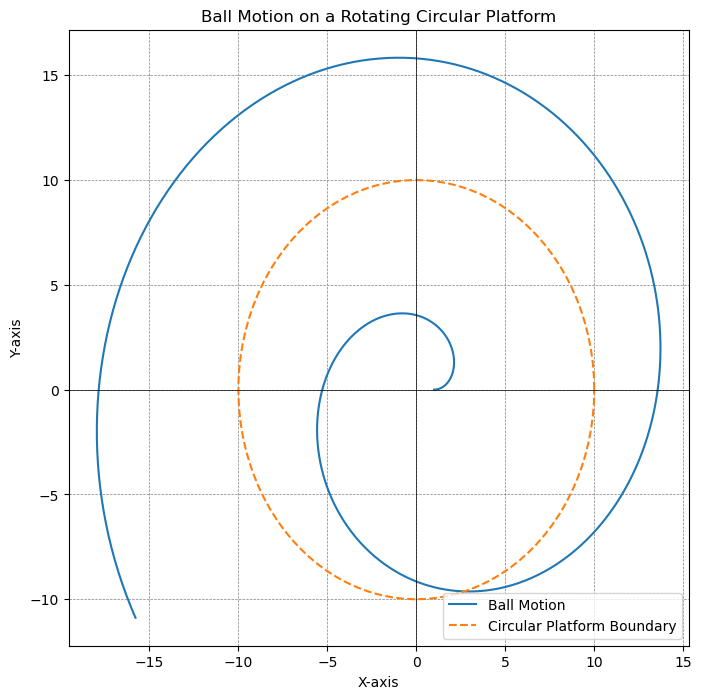

Time to reach the boundary: 0.00 seconds


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def ball_motion(t, r0, v0, omega):
    x = r0 + v0 * t * np.cos(omega * t)
    y = v0 * t * np.sin(omega * t)
    return x, y

def circle_boundary(r0):
    theta = np.linspace(0, 2*np.pi, 100)
    x_boundary = r0 * np.cos(theta)
    y_boundary = r0 * np.sin(theta)
    return x_boundary, y_boundary

def main():
    # Parameters
    r = 10
    r0 = 1.0        # Initial radial position
    v0 = 2.0        # Initial velocity
    omega = 1.0     # Angular velocity of the platform

    # Time array
    t_values = np.linspace(0, 10, 1000)

    # Calculate ball motion
    x_values, y_values = ball_motion(t_values, r0, v0, omega)

    # Plot the motion
    plt.figure(figsize=(8, 8))
    plt.plot(x_values, y_values, label='Ball Motion')
    
    # Plot the circular platform boundary
    x_boundary, y_boundary = circle_boundary(r)
    plt.plot(x_boundary, y_boundary, label='Circular Platform Boundary', linestyle='--')

    plt.title('Ball Motion on a Rotating Circular Platform')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

    # Find the time it takes to reach the boundary
    boundary_index = np.argmax(np.sqrt(x_values**2 + y_values**2) >= r0)
    time_to_boundary = t_values[boundary_index]

    print(f"Time to reach the boundary: {time_to_boundary:.2f} seconds")

if __name__ == "__main__":
    main()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate effective acceleration
def effective_acceleration(omega, r, v_r):
    coriolis_force = -np.cross(omega, np.cross(omega, r))
    centrifugal_force = -2 * np.cross(omega, v_r)
    a_eff = coriolis_force + centrifugal_force
    return a_eff

# Function to simulate motion under the influence of forces
def simulate_motion(omega, r0, v0, time_step, num_steps):
    r = r0
    v_r = np.array([0, v0, 0])  # Initial velocity vector
    trajectory = [r]

    for _ in range(num_steps):
        a_eff = effective_acceleration(omega, r, v_r)
        v_r += a_eff * time_step
        r += v_r * time_step
        trajectory.append(r.copy())

    return np.array(trajectory)

def main():
    # Parameters
    omega = np.array([0, 0, 1])  # Angular velocity vector
    r0 = np.array([1, 0, 0])    # Initial position vector
    v0 = 1.0                    # Initial velocity magnitude
    time_step = 0.01
    num_steps = 1000

    # Simulate motion
    trajectory = simulate_motion(omega, r0, v0, time_step, num_steps)

    # Plot trajectory in 3D
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='Particle Trajectory')

    ax.set_title('Motion Under Coriolis and Centrifugal Forces')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

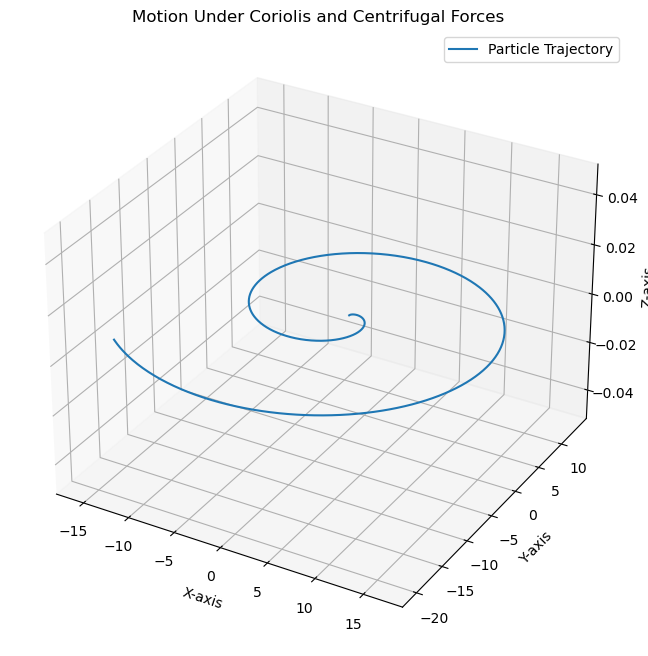

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def effective_acceleration(omega, r, v_r):
    centrifugal_force = -np.cross(omega, np.cross(omega, r))
    coriolis_force = -2*np.cross(omega, v_r)
    a_eff = coriolis_force + centrifugal_force
    return a_eff

def simulate_motion(omega, r0, v0, dt, num_steps):
    r = r0.astype(float)  # ensure that it is float64
    v_r = np.array([0, v0, 0], dtype=float)  # initial velocity vector
    trajectory = [r.copy()]

    for _ in range(num_steps):
        a_eff = effective_acceleration(omega, r, v_r)
        v_r += a_eff*dt
        r += v_r*dt
        trajectory.append(r.copy())

    return np.array(trajectory)

def main():
    # Parameters
    omega = np.array([0, 0, 1], dtype=float)  # Angular velocity vector
    r0 = np.array([1, 0, 0], dtype=float)     # Initial position vector
    v0 = 1.0                                  # Initial velocity magnitude
    dt = 0.01
    num_steps = 1000

    # Simulate motion
    trajectory = simulate_motion(omega, r0, v0, dt, num_steps)

    # Plot trajectory in 3D
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='Particle Trajectory')

    ax.set_title('Motion Under Coriolis and Centrifugal Forces')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def effective_acceleration(omega, r, v_r):
    coriolis_force = -np.cross(omega, np.cross(omega, r))
    centrifugal_force = -2 * np.cross(omega, v_r)
    a_eff = coriolis_force + centrifugal_force
    return a_eff

def simulate_motion(omega, r0, v0, time_step, num_steps):
    r = r0.astype(float)
    v_r = np.array([0, v0], dtype=float)  # 2D motion
    trajectory = [r.copy()]

    for _ in range(num_steps):
        a_eff = effective_acceleration(omega, r, v_r)
        v_r += a_eff * time_step
        r += v_r * time_step
        trajectory.append(r.copy())

    return np.array(trajectory)

def circle_boundary(r0, num_points=100):
    theta = np.linspace(0, 2*np.pi, num_points)
    x_boundary = r0 * np.cos(theta)
    y_boundary = r0 * np.sin(theta)
    return x_boundary, y_boundary

def main():
    # Parameters
    omega = np.array([0, 0, 1], dtype=float)  # Angular velocity vector
    r0 = np.array([1, 0], dtype=float)         # Initial position vector (2D)
    v0 = 1.0                                  # Initial velocity magnitude
    time_step = 0.01
    num_steps = 1000

    # Simulate motion
    trajectory = simulate_motion(omega, r0, v0, time_step, num_steps)

    # Plot trajectory and circular platform boundary in 2D
    plt.figure(figsize=(8, 8))
    plt.plot(trajectory[:, 0], trajectory[:, 1], label='Particle Trajectory')

    x_boundary, y_boundary = circle_boundary(np.linalg.norm(r0))
    plt.plot(x_boundary, y_boundary, label='Circular Platform Boundary', linestyle='--')

    plt.title('Motion Under Coriolis and Centrifugal Forces')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()

    # Find the time it takes to reach the boundary
    boundary_index = np.argmax(np.linalg.norm(trajectory, axis=1) >= np.linalg.norm(r0))
    time_to_boundary = boundary_index * time_step

    print(f"Time to reach the boundary: {time_to_boundary:.2f} seconds")

    plt.show()

if __name__ == "__main__":
    main()


ValueError: operands could not be broadcast together with shapes (2,) (3,) (2,) 